## Data Wrangling: NYC Walk Scores and Grant Eligiblity
### By Darcy McCusker

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


## 1. Gather data


### **1.1.** Problem Statement

In this project, I'm interested in the relationships between walkability scores, population, low/middle income population, households, housing units, and Community Development Block Grant (CDBG) eligibility in New York City. To investigate, I will use one dataset that includes information about walkability, total population, housing units, and households from the EPA for every census block in the country. The other dataset comes from NYC's open city data program and includes information on the low/middle income population and grant eligibility of each census tract in the city. To be eligible, a census tract must be primarily residential and have at least 51% of the population at the low/middle income level. Grants can be used for a variety of projects, including improvements to walking infrastructure. A question I want to answer:
>  Do tracts that are grant eligible have better walk scores? 


### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**: Community Development Block Grant (CDBG) Eligibility by Census Tract for New York City

Type: JSON

Method: The data was gathered as a JSON directly from the source website. 

Dataset variables:

BoroCT <br>
Borough <br>
Number of Low-/ Moderate-Income Persons <br>
Percent of Low-/ Moderate-Income Persons <br>
Eligibility for Community Development Block Grant (CDBG)

In [2]:
response = requests.get("https://data.cityofnewyork.us/api/views/qmcw-ur37/rows.json?accessType=DOWNLOAD")
response.raise_for_status()

In [3]:
print(response)

<Response [200]>


In [ ]:
grant_eligible = response.json()
grant_eligible['data']


In [ ]:
ge_df = pd.DataFrame(grant_eligible['data'])

In [ ]:
ge_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,row-wb8v_2z8x~reub,00000000-0000-0000-F7D2-97121534DD43,0,1561558954,None,1561558954,None,{ },1,1,1000100,1145016,0,0,0,0,None,Ineligible,1000100
1,row-tpbm~wpni-3ywj,00000000-0000-0000-6DB0-E9A41949C38D,0,1561558954,None,1561558954,None,{ },2,1,1000201,1388727.07,900498,0.648434109,2775,2615,0.942342342,CD Eligible,1000201
2,row-smfv.uyme.ruig,00000000-0000-0000-58EF-7EC9819E2AE1,0,1561558954,None,1561558954,None,{ },3,1,1000202,3756530.28,2717159.48,0.723316273,7525,5515,0.732890365,CD Eligible,1000202
3,row-q5fw~ktkw~5h7a,00000000-0000-0000-D95F-EF4C8B3CF3F6,0,1561558954,None,1561558954,None,{ },4,1,1000500,3250106.25,0,0,0,0,None,Ineligible,1000500
4,row-n22r~t87y_8haa,00000000-0000-0000-7B38-1F334FF468E7,0,1561558954,None,1561558954,None,{ },5,1,1000600,6122656.63,4637698.01,0.757464985,12360,10870,0.879449838,CD Eligible,1000600


#### Dataset 2: Walkability Index by Census Block

Type: CSV File

Method: Read CSV directly from website

Dataset variables:

Census Tract <br>
County <br>
State <br>
Walkability Score <br>
Total Population <br>
Housing Units <br>
Households (occupied housing units)

In [7]:
walk_df = pd.read_csv("https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

In [8]:
walk_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [9]:
walk_df.to_csv('walkability_score_by_census_block_raw.csv', index=False)
ge_df.to_csv('CBDG_eligiblity_by_census_tract_raw.csv', index=False)

## 2. Assess data


### Tidiness Issue 1: Missing labels and repeated columns


First, I'll inspect visually the first few rows of data and a larger sample of rows for the database of grant eligible blocks. 

In [10]:
ge_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,row-wb8v_2z8x~reub,00000000-0000-0000-F7D2-97121534DD43,0,1561558954,None,1561558954,None,{ },1,1,1000100,1145016,0,0,0,0,None,Ineligible,1000100
1,row-tpbm~wpni-3ywj,00000000-0000-0000-6DB0-E9A41949C38D,0,1561558954,None,1561558954,None,{ },2,1,1000201,1388727.07,900498,0.648434109,2775,2615,0.942342342,CD Eligible,1000201
2,row-smfv.uyme.ruig,00000000-0000-0000-58EF-7EC9819E2AE1,0,1561558954,None,1561558954,None,{ },3,1,1000202,3756530.28,2717159.48,0.723316273,7525,5515,0.732890365,CD Eligible,1000202
3,row-q5fw~ktkw~5h7a,00000000-0000-0000-D95F-EF4C8B3CF3F6,0,1561558954,None,1561558954,None,{ },4,1,1000500,3250106.25,0,0,0,0,None,Ineligible,1000500
4,row-n22r~t87y_8haa,00000000-0000-0000-7B38-1F334FF468E7,0,1561558954,None,1561558954,None,{ },5,1,1000600,6122656.63,4637698.01,0.757464985,12360,10870,0.879449838,CD Eligible,1000600


In [11]:
ge_df.sample(20, random_state = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1545,row-3dj7-fm4a~kfhg,00000000-0000-0000-0EFE-B62229358B36,0,1561558954,None,1561558954,None,{ },1547,4,4020500,1771132,280242,0.158227619,985,560,0.568527919,Ineligible,4020500
1141,row-u5yb-y7qi-pdjb,00000000-0000-0000-08B7-E931FE3AB0E9,0,1561558954,None,1561558954,None,{ },1142,3,3060600,1908026,1337333,0.70089873,2470,1620,0.655870445,CD Eligible,3060600
861,row-dpcv.cfyy~ztk7,00000000-0000-0000-4EF0-3F9EA7C603C4,0,1561558954,None,1561558954,None,{ },862,3,3028300,1663796,1403885,0.843784334,3990,3215,0.805764411,CD Eligible,3028300
573,row-u75x_58by.rwc8,00000000-0000-0000-4FED-400A384B3D90,0,1561558954,None,1561558954,None,{ },573,2,2039400,1867912,1562007,0.836231578,4690,3610,0.769722814,CD Eligible,2039400
1858,row-5nyk.tj4i_jab2,00000000-0000-0000-7E98-98FCE132A335,0,1561558954,None,1561558954,None,{ },1860,4,4071306,2966162.69,2845520.69,0.959327248,6250,2715,0.4344,Ineligible,4071306
367,row-3s4k_4y2e~xy4r,00000000-0000-0000-51AB-EE46D5DD8177,0,1561558954,None,1561558954,None,{ },367,2,2013500,1848807,1466009,0.792948642,3905,2885,0.738796415,CD Eligible,2013500
1712,row-xesj~rphb~5vdc,00000000-0000-0000-D9A1-C8D468676914,0,1561558954,None,1561558954,None,{ },1714,4,4049500,543842,522812,0.961330681,1285,695,0.540856031,CD Eligible,4049500
201,row-7ish.ueh3~297d,00000000-0000-0000-8F5A-669436B2CB30,0,1561558954,None,1561558954,None,{ },201,1,1019400,3613356,2285984,0.63264843,6655,5975,0.897821187,CD Eligible,1019400
1649,row-bjk7_gisi_3q4j,00000000-0000-0000-0774-EC16FD2A58C8,0,1561558954,None,1561558954,None,{ },1651,4,4040000,607460,566969,0.933343759,1475,530,0.359322034,Ineligible,4040000
1236,row-4yqi-x9f8.6wbm,00000000-0000-0000-142B-F2660AEEC787,0,1561558954,None,1561558954,None,{ },1237,3,3081800,2558468,2181122,0.852510956,4250,2960,0.696470588,CD Eligible,3081800


A few things are obvious from this inspection. The columns are missing labels. Many of the columns are repeated (3 and 5; 4 and 6; 10 and 18). Columns 0 through 7 do not appear to contain any meaningful data. Rows 1551 and 1643 include 0s in columns 12-15; it's not clear if those are meaningful values or missing values. Rows 0 and 4 have None in column 16. <br>

Next, let's investigate more programmatically. 

In [12]:
ge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2164 non-null   object
 1   1       2164 non-null   object
 2   2       2164 non-null   int64 
 3   3       2164 non-null   int64 
 4   4       0 non-null      object
 5   5       2164 non-null   int64 
 6   6       0 non-null      object
 7   7       2164 non-null   object
 8   8       2164 non-null   object
 9   9       2164 non-null   object
 10  10      2164 non-null   object
 11  11      2164 non-null   object
 12  12      2164 non-null   object
 13  13      2161 non-null   object
 14  14      2164 non-null   object
 15  15      2164 non-null   object
 16  16      2115 non-null   object
 17  17      2164 non-null   object
 18  18      2164 non-null   object
dtypes: int64(3), object(16)
memory usage: 321.3+ KB


This confirms that 4 and 6 do not contain any data. It also shows that many of the numbers included in the dataframe are not of the right data type. Column 10 is best stored as an object (ie. string) because of the possibility of leading zeros, but columns 11-15 are better stored as ints or floats. Column 16 is missing values. <br>

Let's check for duplicated BoroCT numbers

In [13]:
ge_df[10].value_counts().sort_values()

1000100    1
1000600    1
1000700    1
1000800    1
1000900    1
          ..
5025100    1
4144100    1
5019700    1
5027702    1
5032300    1
Name: 10, Length: 2164, dtype: int64

There are no duplicated BoroCTs. <br>
Let's check that each block has a desgination as eligible or ineligible. 

In [14]:
ge_df[17].value_counts(dropna=False).sort_values()

Ineligible      997
CD Eligible    1167
Name: 17, dtype: int64

Let's check on those 0 values and try to determine if they're missing data or valid zeros. 

In [15]:
ge_df[15].value_counts(dropna=False).sort_values()

3210     1
2345     1
4720     1
6900     1
6005     1
        ..
985      8
2030     8
995      9
880     12
0       52
Name: 15, Length: 899, dtype: int64

In [16]:
ge_df[16].value_counts(dropna=False)

None           49
0.666666667     6
0.2             5
0.5             4
0.7             3
               ..
0.561165049     1
0.677804296     1
0.654193548     1
0.734177215     1
0.438053097     1
Name: 16, Length: 2067, dtype: int64

It'll be easier to see once the labels are updated, but column 11-15's 0s are legitimate values, while the "None" value in column 16 needs to be replaced with 0s. 

Issue and justification: To tidy up the data set, several steps need to be taken:
>1. Create a new clean version that drops irrelevant columns and renames the necessary columns
>2. Fix data type errors
> 3. Replace Nan values in column 16 with 0s

Doing so will make the data set readable: each column will contain a relevant variable, each row will represent one observation, and the table as a whole will represent one type of observational unit. 

After finding a few tidiness issues in the first dataset, I want to check the second data set. 

First, I'll visually inspect the walkability score database by looking at the first few rows of data and a larger sample of rows.

In [17]:
walk_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [18]:
walk_df.sample(20,random_state = 1)

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
81948,81949,1.701900e+11,1.701900e+11,17,19,10204,3,NaN,NaN,16580.0,...,-99999.000000,-99999.000000,-99999.000000,14,18,6,1,7.666667,9100.983051,2.515208e+06
97504,97505,1.911800e+11,1.911800e+11,19,117,950300,1,NaN,NaN,NaN,...,-99999.000000,-99999.000000,-99999.000000,8,5,4,1,3.833333,21188.805870,2.097928e+07
211822,211823,5.410700e+11,5.410700e+11,54,107,702,2,425.0,"Parkersburg-Marietta-Vienna, WV-OH",37620.0,...,-99999.000000,-99999.000000,-99999.000000,17,8,11,1,8.166667,4994.773076,7.195443e+05
84794,84795,1.703140e+11,1.703140e+11,17,31,410600,1,176.0,"Chicago-Naperville, IL-IN-WI",16980.0,...,0.291299,0.000272,0.349608,9,2,16,19,13.500000,1426.332952,1.265114e+05
182176,182177,4.010910e+11,4.010910e+11,40,109,108011,3,416.0,"Oklahoma City-Shawnee, OK",36420.0,...,0.050386,0.000291,0.018403,4,10,9,14,10.000000,6314.382153,1.636115e+06
104736,104737,2.201500e+11,2.201500e+11,22,15,10806,2,508.0,"Shreveport-Bossier City-Minden, LA",43340.0,...,-99999.000000,-99999.000000,-99999.000000,2,6,10,1,5.000000,4209.584901,5.017146e+05
53625,53626,6.001406e+10,6.001406e+10,6,1,406201,3,488.0,"San Jose-San Francisco-Oakland, CA",41860.0,...,0.308450,0.000619,0.337115,5,6,19,19,14.500000,1535.862574,8.702958e+04
215001,215002,5.511700e+11,5.511700e+11,55,117,900,2,NaN,NaN,43100.0,...,-99999.000000,-99999.000000,-99999.000000,8,16,14,1,9.000000,3690.781787,7.504439e+05
23546,23547,1.015002e+10,1.015002e+10,1,15,1800,6,NaN,NaN,11500.0,...,-99999.000000,-99999.000000,-99999.000000,3,7,8,1,4.666667,7172.311279,2.049168e+06
176914,176915,3.909980e+11,3.909980e+11,39,99,812001,4,566.0,"Youngstown-Warren, OH-PA",49660.0,...,-99999.000000,-99999.000000,-99999.000000,19,19,8,1,9.333333,7422.439925,2.051965e+06


One immediate issue: there are 117 columns, which makes working with the dataframe difficult, especially when many of the columns are not relevant variables. Only a small selection of columns are even visible, although most of the relevant variables are visible. <br>
Additionally, to combine with the other dataset, many rows will need to be filtered out, since the other dataset is specific to New York City. 

Let's look programatically at some of the variables. 
<br>
First, let's get some info on the data types. 


In [19]:
walk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Columns: 117 entries, OBJECTID to Shape_Area
dtypes: float64(73), int64(42), object(2)
memory usage: 197.0+ MB


Since the dataset has so many columns, the info method can't display for each column. But we can see most data types are either floats or ints, even though some should be stored as strings. <br>
Next, let's check for duplicated rows

In [20]:
walk_df.duplicated().value_counts()

False    220740
dtype: int64

Let's make sure the walk scores are between 1 and 20 and there are no NaNs:

In [21]:
walk_df['NatWalkInd'].value_counts(dropna = False)

6.000000     3229
5.666667     3222
7.000000     3199
6.666667     3178
7.333333     3177
             ... 
19.666667      96
19.500000      83
19.833333      47
1.166667       45
20.000000      29
Name: NatWalkInd, Length: 115, dtype: int64

Looks good. Let's investigate some of the variables that have so far been hard to see. 

In [22]:
walk_df["TotPop"].value_counts(dropna = False)

0       1154
960      186
818      185
954      184
994      179
        ... 
7550       1
6177       1
8188       1
5343       1
4864       1
Name: TotPop, Length: 6407, dtype: int64

In [23]:
walk_df["CountHU"].value_counts(dropna = False)

0.0       1519
429.0      461
415.0      428
358.0      427
392.0      421
          ... 
3842.0       1
3744.0       1
2221.0       1
4482.0       1
1998.0       1
Name: CountHU, Length: 3138, dtype: int64

In [24]:
walk_df["HH"].value_counts(dropna = False)

0.0       1575
374.0      476
406.0      474
368.0      467
333.0      458
          ... 
3040.0       1
4910.0       1
3128.0       1
5267.0       1
2458.0       1
Name: HH, Length: 2823, dtype: int64

The data types look accurate for each of these. There are no major tidiness issues that need to be resolved with the walk score dataset at this point, but we will still need to make sure the datsets are tidy enough to be combined. I'll look for some quality issues first, then return to the tidiness issue later. 

### Quality Issue 1: Inaccurate census tract IDs

First, let's visually inspect the walk score database:

In [25]:
walk_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


The tract ID should be 6 characters long, but it is only 4 characters for each of the first five rows. Leading zeroes will need to be added. 

Next, let's look programmatically. One easy way to get the correct leading zeroes for each tract ID would be to extract it from the GEO ID. Let's check that every GEO ID is unique. 

In [26]:
walk_df['GEOID20'].value_counts()

1.703180e+11    2119
4.811300e+11    1667
1.208600e+11    1584
5.303300e+11    1421
4.210100e+11    1325
                ... 
6.067008e+10       1
6.019003e+10       1
6.019003e+10       1
6.019006e+10       1
6.075031e+10       1
Name: GEOID20, Length: 43062, dtype: int64

Many are repeated, indicating that the last digits of the GEO IDs were lost when the dataset was loaded. 

Issue and justification: Census tract IDs should be a standard length of 6 numbers, including leading zeros. The GEO ID column should be an easy way to get this value; however, the GEO ID column was converted to scientific notation at some point and the relevant data (the last 7 numbers) were lost as a result. Instead, leading zeroes will need to be added to the census tract ID column. 
<br>
To recreate the accurate block IDs:
> Add the appropriate number of leading zeros to the tract ID 


### Quality Issue 2:  Inconsistent labeling of boroughs/county across each dataset 

Let's look at how the grant eligibilty dataframe shows county information: 

In [27]:
ge_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,row-wb8v_2z8x~reub,00000000-0000-0000-F7D2-97121534DD43,0,1561558954,None,1561558954,None,{ },1,1,1000100,1145016,0,0,0,0,None,Ineligible,1000100
1,row-tpbm~wpni-3ywj,00000000-0000-0000-6DB0-E9A41949C38D,0,1561558954,None,1561558954,None,{ },2,1,1000201,1388727.07,900498,0.648434109,2775,2615,0.942342342,CD Eligible,1000201
2,row-smfv.uyme.ruig,00000000-0000-0000-58EF-7EC9819E2AE1,0,1561558954,None,1561558954,None,{ },3,1,1000202,3756530.28,2717159.48,0.723316273,7525,5515,0.732890365,CD Eligible,1000202
3,row-q5fw~ktkw~5h7a,00000000-0000-0000-D95F-EF4C8B3CF3F6,0,1561558954,None,1561558954,None,{ },4,1,1000500,3250106.25,0,0,0,0,None,Ineligible,1000500
4,row-n22r~t87y_8haa,00000000-0000-0000-7B38-1F334FF468E7,0,1561558954,None,1561558954,None,{ },5,1,1000600,6122656.63,4637698.01,0.757464985,12360,10870,0.879449838,CD Eligible,1000600


It doesn't list the county, but instead lists a borough code. 
Now let's see how the walk score dataframe shows county information: 

In [28]:
walk_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


It shows a FIPS county code; the state plus county code is unique, but once we've filtered out irrelevant rows in the cleaning stage, it'll be easier to just focus in on the NYC specific counties. <br>
Luckily, boroughs correspond to counties: each borough of New York City is its own county. The county codes in the walk score dataframe will need to be matched up with the borough code in the grant data so that the data is displayed in a standardized way. 

Issue and justification: Each database uses a different way to keep track of the same information. The grant eligibility dataframe keeps track of borough and the walkability score dataframe uses county codes. These will need to be made consistent in order for the datasets to be combined. 
<br>
To standardize county/borough codes across both datasets:
> Make a new column for BoroID in the walk score dataframe


### Tidiness Issue 2: Non-unique identifiers 

Once we've added borough codes to the walk score dataframe, it should be possible to match census tracts to BoroCTs. Let's confirm that we can do so. 

First, let's find some matching rows. To do so, I'll do some filtering just to NY state and Bronx county in the walk score dataframe. The information about the matching codes comes from: https://www2.census.gov/geo/docs/reference/codes2020/cou/st36_ny_cou2020.txt

In [29]:
filtered_walk = walk_df[walk_df["STATEFP"] == 36]
filtered_walk = filtered_walk[filtered_walk["COUNTYFP"] == 5]
filtered_walk.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
149764,149765,3.600500e+11,3.600500e+11,36,5,7900,2,408.0,"New York-Newark, NY-NJ-CT-PA",35620.0,...,0.215882,0.000134,0.318378,6,3,12,19,11.833333,706.126582,22999.60622
149772,149773,3.600500e+11,3.600500e+11,36,5,42100,2,408.0,"New York-Newark, NY-NJ-CT-PA",35620.0,...,0.372379,0.000206,0.490911,12,10,20,19,16.666667,791.895810,26107.38662
149773,149774,3.600500e+11,3.600500e+11,36,5,37100,2,408.0,"New York-Newark, NY-NJ-CT-PA",35620.0,...,0.184089,0.000096,0.229522,13,8,12,18,13.500000,1366.437489,66952.72010
149774,149775,3.600500e+11,3.600500e+11,36,5,11900,2,408.0,"New York-Newark, NY-NJ-CT-PA",35620.0,...,0.196026,0.000119,0.282769,13,2,1,17,8.500000,1123.716803,41526.43688
149775,149776,3.600500e+11,3.600500e+11,36,5,32300,2,408.0,"New York-Newark, NY-NJ-CT-PA",35620.0,...,0.221306,0.000113,0.268748,1,13,8,18,11.000000,1047.514151,47657.78160


Let's try to find the first row: the whole census tract code should be '007900' and it should correspond to a BoroCT in the grants dataframe. 

In [30]:
filtered_ge = ge_df[ge_df[10] =="007900" ]
filtered_ge

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


Uh oh. There is nothing in the filtered dataframe. Let's see if we can find a BoroCT that contains the right digits. 


In [31]:
filtered_ge = ge_df[ge_df[10].str.contains("007900") ]
filtered_ge

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
78,row-kryg~rqqe~8cmj,00000000-0000-0000-192B-17A7A62422D6,0,1561558954,None,1561558954,None,{ },78,1,1007900,6273588.38,3254998,0.518841499,4100,1015,0.247560976,Ineligible,1007900
340,row-6cnb.yrru-nait,00000000-0000-0000-5F0F-D8B932849FC6,0,1561558954,None,1561558954,None,{ },340,2,2007900,2786362.86,2005451.86,0.719738225,6305,5800,0.919904837,CD Eligible,2007900
1441,row-b2jm~drmu_xxgi,00000000-0000-0000-CDAB-1C2ED90DC911,0,1561558954,None,1561558954,None,{ },1443,4,4007900,1537528,1276083,0.829957568,3425,2590,0.75620438,CD Eligible,4007900


Excellent! It looks like this tract number appears in three different boroughs, but only one in Bronx County (the second one). So while the BoroCT <i>corresponds </i> to a specific census tract, they are not the same values. Instead, BoroCTs also add a first digit that corresponds to the Boro ID. 
<br>
Since the datasets will need to be combined eventually, it will be easiest if there is one unique key across both datasets. Tract numbers aren't unique, but BoroCTs are.

Issue and justification: To tidy up the data sets for combination, I will make a new column in the walk score dataset that matches each census tract with a BoroCT to make a BoroID that can be matched with the BoroID in the grant eligibility dataset. 

Doing so will make the data set readable: each column will contain a relevant variable, each row will represent one observation, and the table as a whole will represent one type of observational unit. 

## 3. Clean data

### **Tidiness Issue 1: Missing labels and repeated columns**

First, let's create a new dataframe and bring over the relevant columns.

In [32]:
clean_ge = ge_df[[9, 10, 14, 15, 16, 17]]
clean_ge.head()

,9,10,14,15,16,17
0,1,1000100,0,0,None,Ineligible
1,1,1000201,2775,2615,0.942342342,CD Eligible
2,1,1000202,7525,5515,0.732890365,CD Eligible
3,1,1000500,0,0,None,Ineligible
4,1,1000600,12360,10870,0.879449838,CD Eligible


Now let's rename the columns. First I need to recast them as strings, then create a dictionary of the new labels. Once I've done that, I can rename the columns.  

In [33]:
clean_ge.columns = clean_ge.columns.astype(str)
columns_dict = { "9": "BoroID", "10" : "BoroCT", "14" : "TotalPop", "15" : "LowMod_Pop", "16": "LowMod_Pct", "17" : "Eligibility" }
clean_ge = clean_ge.rename(columns=columns_dict)
clean_ge.head()

,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility
0,1,1000100,0,0,None,Ineligible
1,1,1000201,2775,2615,0.942342342,CD Eligible
2,1,1000202,7525,5515,0.732890365,CD Eligible
3,1,1000500,0,0,None,Ineligible
4,1,1000600,12360,10870,0.879449838,CD Eligible


Now let's replace the NaNs with 0s. The percent of low and middle income people couldn't be calculated from the low and middle income pop dividied by the total pop if both values were 0 since that would result in division by zero, but if there are no people, the percent that are low or middle income is in fact also 0%.  

In [34]:
clean_ge['LowMod_Pct'].fillna(0, inplace=True)

Let's check our data types. 

In [35]:
clean_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BoroID       2164 non-null   object
 1   BoroCT       2164 non-null   object
 2   TotalPop     2164 non-null   object
 3   LowMod_Pop   2164 non-null   object
 4   LowMod_Pct   2164 non-null   object
 5   Eligibility  2164 non-null   object
dtypes: object(6)
memory usage: 101.6+ KB


The population and percent columns should be ints and floats, respectively. Let's cast them to the correct types. 

In [36]:
clean_ge["TotalPop"] =  clean_ge["TotalPop"].astype(int)
clean_ge["LowMod_Pop"] =  clean_ge["LowMod_Pop"].astype(int)
clean_ge["LowMod_Pct"] =  clean_ge["LowMod_Pct"].astype(float)

Let's confirm these changes programatically using .info()

In [37]:
clean_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BoroID       2164 non-null   object 
 1   BoroCT       2164 non-null   object 
 2   TotalPop     2164 non-null   int64  
 3   LowMod_Pop   2164 non-null   int64  
 4   LowMod_Pct   2164 non-null   float64
 5   Eligibility  2164 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 101.6+ KB


Justification: I created a clean dataframe with only the relevant columns to make analysis easier and clearer. Then, I renamed the columns to descriptive labels to make sure I can keep track of variables better during my analysis. Finally, I changed some data types. I turned population values from strings into ints and a percentage into a float. I kept some numbers as strings, because I will need to manipulate the strings in my steps to address quality. 

### Quality Issue 1: Inaccurate census tract IDs

First, I'll create a new dataframe with just the relevant columns for analysis. 

In [38]:
clean_walk = walk_df[["STATEFP","COUNTYFP","TRACTCE","BLKGRPCE","TotPop", "CountHU","HH","NatWalkInd"]]
clean_walk.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd
0,48,113,7825,4,1202,460.0,423.0,14.000000
1,48,113,7825,2,710,409.0,409.0,10.833333
2,48,113,7825,3,737,365.0,329.0,8.333333
3,48,113,7824,1,904,384.0,384.0,15.666667
4,48,113,7824,2,948,343.0,343.0,10.166667


Next, let's filter it to just New York state and the NYC counties. The county numbers come from: https://www2.census.gov/geo/docs/reference/codes2020/cou/st36_ny_cou2020.txt

In [39]:
clean_walk = clean_walk[clean_walk["STATEFP"] == 36]
clean_walk = clean_walk.loc[(clean_walk['COUNTYFP'].isin([5, 47, 61, 81, 85]))]
clean_walk = clean_walk.reset_index(drop = True)
clean_walk.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd
0,36,81,25900,2,1278,448.0,405.0,17.333333
1,36,81,16600,2,1568,447.0,447.0,14.333333
2,36,81,122702,1,2363,962.0,962.0,9.666667
3,36,81,28300,5,2614,1255.0,1181.0,10.833333
4,36,81,148300,4,883,329.0,329.0,15.333333


Now, let's look at the data types. 

In [40]:
clean_walk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATEFP     6493 non-null   int64  
 1   COUNTYFP    6493 non-null   int64  
 2   TRACTCE     6493 non-null   int64  
 3   BLKGRPCE    6493 non-null   int64  
 4   TotPop      6493 non-null   int64  
 5   CountHU     6493 non-null   float64
 6   HH          6493 non-null   float64
 7   NatWalkInd  6493 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 405.9 KB


I need the tract ID as a string to add leading zereos, but it also will be helpful to keep it as a number, so I'll create a new column to keep both an int and a string, and a clear label so I know which is which. 

In [41]:
clean_walk["TRACTStr"] = clean_walk["TRACTCE"].astype(str)

The number of housing units and households are both floats, but they should be ints. Let's recast them. 

In [42]:
clean_walk["CountHU"] = clean_walk["CountHU"].astype(int)
clean_walk["HH"] = clean_walk["HH"].astype(int)

Let's check that our changes are complete. 

In [43]:
clean_walk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATEFP     6493 non-null   int64  
 1   COUNTYFP    6493 non-null   int64  
 2   TRACTCE     6493 non-null   int64  
 3   BLKGRPCE    6493 non-null   int64  
 4   TotPop      6493 non-null   int64  
 5   CountHU     6493 non-null   int64  
 6   HH          6493 non-null   int64  
 7   NatWalkInd  6493 non-null   float64
 8   TRACTStr    6493 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 456.7+ KB


In [44]:
clean_walk.sample(20,random_state=1)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr
4701,36,47,48400,2,1748,419,419,16.333333,48400
3594,36,81,3300,2,424,150,131,15.000000,3300
4341,36,81,49500,1,1571,526,499,12.333333,49500
5692,36,81,129104,2,840,507,460,11.000000,129104
5126,36,81,147900,1,1598,573,564,17.500000,147900
4583,36,47,100600,2,1328,523,492,12.166667,100600
4104,36,47,6000,2,1034,482,417,18.666667,6000
5683,36,5,32300,3,316,151,151,13.166667,32300
4567,36,47,62800,4,1362,655,488,14.666667,62800
3205,36,5,14400,4,1101,473,473,11.000000,14400


Using .info() and .sample(), I can see that I have the tract ID as a number and as a string and that all my data is filtered to just the relevant state and counties. 

Let's turn the string version of the census tract into a consistent 6 digits, including leading zeroes. Conveniently, python has a built in function to help us. 

In [45]:
clean_walk["TRACTStr"] = clean_walk["TRACTStr"].apply(lambda x: x.zfill(6))


In [46]:
clean_walk.sample(20,random_state=1)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr
4701,36,47,48400,2,1748,419,419,16.333333,048400
3594,36,81,3300,2,424,150,131,15.000000,003300
4341,36,81,49500,1,1571,526,499,12.333333,049500
5692,36,81,129104,2,840,507,460,11.000000,129104
5126,36,81,147900,1,1598,573,564,17.500000,147900
4583,36,47,100600,2,1328,523,492,12.166667,100600
4104,36,47,6000,2,1034,482,417,18.666667,006000
5683,36,5,32300,3,316,151,151,13.166667,032300
4567,36,47,62800,4,1362,655,488,14.666667,062800
3205,36,5,14400,4,1101,473,473,11.000000,014400


Excellent. Using sample, we can see each tract string has the appropriate number of leading zeroes. 

Justification: Now that we have a string with the corrected tract ID, we can use this to create a BoroCT for each tract that will enable combining the datasets. 

### Quality Issue 2:  Inconsistent labeling of boroughs/county across each dataset and non-unique identifiers


To make unique BoroCT identifiers for each observation, we need to first have a consistent label for the borough/county across each dataset. Since the goal is to get BoroCTs for each, it will work best to make a new column for the BoroID in the walk score dataframe, then concatenate that with the corrected tract ID strings into a new column for BoroCTs. 

In [47]:
clean_walk["BoroID"] = clean_walk["COUNTYFP"]
clean_walk.loc[clean_walk["COUNTYFP"] == 5,"BoroID" ] = "2"
clean_walk.loc[clean_walk["COUNTYFP"] == 47,"BoroID" ] = "3"
clean_walk.loc[clean_walk["COUNTYFP"] == 61,"BoroID" ] = "1"
clean_walk.loc[clean_walk["COUNTYFP"] == 81,"BoroID" ] = "4"
clean_walk.loc[clean_walk["COUNTYFP"] == 85,"BoroID" ] = "5"


Let's make sure the changes worked. 

In [48]:
clean_walk.sample(20,random_state=3)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID
4707,36,47,52700,4,733,241,241,15.166667,052700,3
4383,36,47,94401,3,1111,324,310,16.166667,094401,3
273,36,81,16600,1,2443,645,617,14.500000,016600,4
1297,36,47,25600,1,1340,472,392,14.166667,025600,3
884,36,61,6100,1,2241,940,721,15.833333,006100,1
2617,36,47,78600,3,2705,1147,1066,16.166667,078600,3
72,36,81,126500,1,905,293,267,13.500000,126500,4
17,36,81,101700,5,821,308,256,16.833333,101700,4
1891,36,81,88400,7,703,195,195,13.500000,088400,4
445,36,81,18600,1,2062,557,510,12.000000,018600,4


Justification: I used the information about county and converted it to borough ID codes so that there is consistency across both datasets for BoroID. 

### Tidiness Issue 2: Non-unique identifiers 

Now that we have borough codes in the walk score dataset, let's combine the BoroID and the tract as a string into one column. It can stay as a string because that's the same data type as in the grants eligibilty dataset. 

In [49]:
clean_walk["BoroCT"] = clean_walk["BoroID"] + clean_walk["TRACTStr"]


Let's check that the changes happened: 

In [50]:
clean_walk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATEFP     6493 non-null   int64  
 1   COUNTYFP    6493 non-null   int64  
 2   TRACTCE     6493 non-null   int64  
 3   BLKGRPCE    6493 non-null   int64  
 4   TotPop      6493 non-null   int64  
 5   CountHU     6493 non-null   int64  
 6   HH          6493 non-null   int64  
 7   NatWalkInd  6493 non-null   float64
 8   TRACTStr    6493 non-null   object 
 9   BoroID      6493 non-null   object 
 10  BoroCT      6493 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 558.1+ KB


In [51]:
clean_walk.sample(20,random_state=1)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT
4701,36,47,48400,2,1748,419,419,16.333333,048400,3,3048400
3594,36,81,3300,2,424,150,131,15.000000,003300,4,4003300
4341,36,81,49500,1,1571,526,499,12.333333,049500,4,4049500
5692,36,81,129104,2,840,507,460,11.000000,129104,4,4129104
5126,36,81,147900,1,1598,573,564,17.500000,147900,4,4147900
4583,36,47,100600,2,1328,523,492,12.166667,100600,3,3100600
4104,36,47,6000,2,1034,482,417,18.666667,006000,3,3006000
5683,36,5,32300,3,316,151,151,13.166667,032300,2,2032300
4567,36,47,62800,4,1362,655,488,14.666667,062800,3,3062800
3205,36,5,14400,4,1101,473,473,11.000000,014400,2,2014400


Justification: I combined it with the tract ID to make a unique identifier for each tract that will make joining the data sets possible. 

### **Remove unnecessary variables and combine datasets**


After cleaning, the state column and county column are unneccesary. Let's drop those. 

In [52]:
clean_walk.drop(columns = ["STATEFP","COUNTYFP"],inplace=True)

Now, let's merge them. Since the walkability dataset is more granular (it also includes blocks, not just census tracts), it needs to be the first data set (ie. the walkability scores) that is merged onto. 

In [53]:
merged_df = pd.merge(clean_walk,clean_ge)
merged_df.head(10)

,TRACTCE,BLKGRPCE,TotPop,CountHU,HH,NatWalkInd,TRACTStr,BoroID,BoroCT,TotalPop,LowMod_Pop,LowMod_Pct,Eligibility
0,25900,2,1278,448,405,17.333333,025900,4,4025900,3350,2565,0.765672,CD Eligible
1,25900,1,2397,721,699,16.000000,025900,4,4025900,3350,2565,0.765672,CD Eligible
2,16600,2,1568,447,447,14.333333,016600,4,4016600,3395,1760,0.518409,CD Eligible
3,16600,1,2443,645,617,14.500000,016600,4,4016600,3395,1760,0.518409,CD Eligible
4,122702,1,2363,962,962,9.666667,122702,4,4122702,7010,5370,0.766049,CD Eligible
5,122702,4,793,279,238,15.000000,122702,4,4122702,7010,5370,0.766049,CD Eligible
6,122702,3,2237,825,825,9.666667,122702,4,4122702,7010,5370,0.766049,CD Eligible
7,122702,2,1313,445,445,17.166667,122702,4,4122702,7010,5370,0.766049,CD Eligible
8,122702,5,841,435,435,9.666667,122702,4,4122702,7010,5370,0.766049,CD Eligible
9,28300,5,2614,1255,1181,10.833333,028300,4,4028300,7315,4435,0.606288,CD Eligible


## 4. Update data stores


In [54]:
clean_walk.to_csv('walkability_score_by_census_block_clean.csv', index=False)
clean_ge.to_csv('CBDG_eligiblity_by_census_tract_clean.csv', index=False)
merged_df.to_csv('Walkability_and_CBDG_eligiblity_by_census_block_merged.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

*Research question:* Is there a relationship between grant eligibility and walk score? Do tracts that are grant eligible have better walk scores? 


First, let's compare the means of the two groups. 

In [55]:
merged_df.groupby(["Eligibility"])["NatWalkInd"].mean()

Eligibility
CD Eligible    13.429615
Ineligible     13.581081
Name: NatWalkInd, dtype: float64

They look very similar! Let's graph them. I'll use a function, in case we need to make the same graph again. 

In [56]:
def grouped_means_graph(df, x_axis, y_axis, fig_size):
    grouped_df = df.groupby([x_axis])[y_axis].mean()
    grouped_df.plot.bar(figsize=(fig_size),title = f"{x_axis} vs mean of {y_axis}", xlabel = x_axis, ylabel = (f'Mean {y_axis}'))

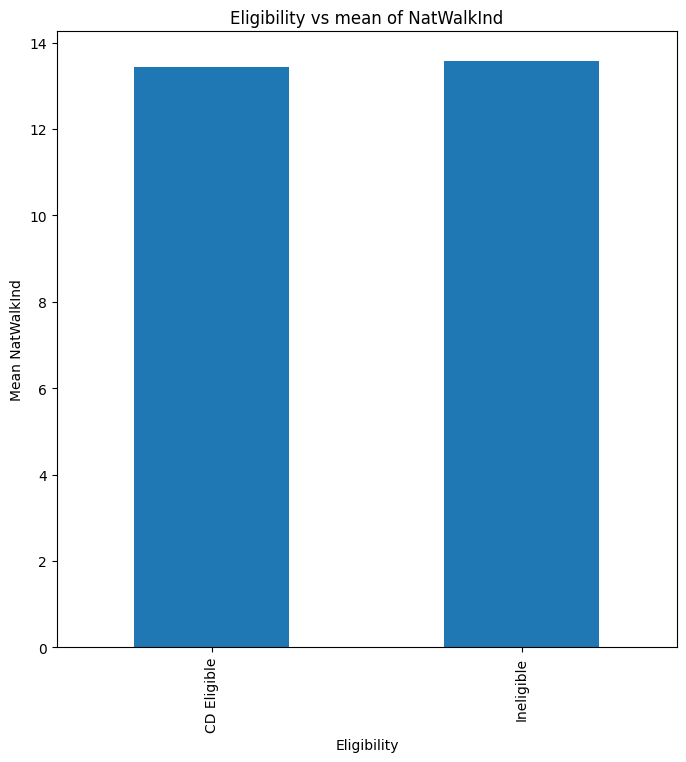

In [57]:
grouped_means_graph(merged_df,"Eligibility","NatWalkInd", (8,8))

*Answer to research question:* This visualization shows the mean walk scores by block, by eligibility. The chart shows two very similarly sized bars; there doesn't appear to be a substantial difference between their walk scores. 

Let's make a box plot for each eligibility category by to see how similar the <i>distributions</i> are. 

NatWalkInd    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

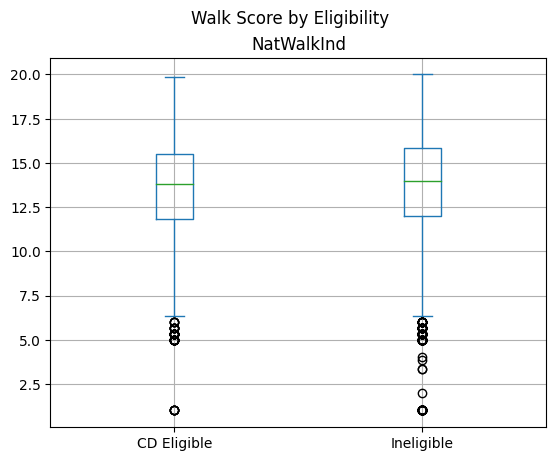

In [58]:
merged_df.plot.box(column = 'NatWalkInd',by ="Eligibility" , grid=True, title ="Walk Score by Eligibility")

*Answer to research question:* These box plots show the distribution of walk scores by eligibility. The plots show a very similar distribution. The IQRs are basically the same, as are the medians. They do differ in the pattern of their outliers, though. There are more low scoring ineligible blocks than there are low scoring eligible blocks. So there are some slight differences between the distributions, but we can still conclude that the walk scores across eligibility are very similar. 

### **5.2:**Next Steps

This project focused on the relationship between walk score and grant eligibility, but there are a number of variable relationships left unexplored in the data. Some additional questions I would like to answer include:
> 1. How does walk score differ by borough?
> 2. Are denser blocks more walkable? 
> 3. Are lower income people living in less or more walkable places than higher income people? 
